# Topic 2: Sampling from a Discrete Distribution
## 1. Inverse Transform Method

In [1]:
import numpy as np
from scipy.stats import uniform

In [2]:
## simple solution
def gen_rv1():
    U = uniform.rvs()
    if U <= 0.1:
        return 1
    elif U <= 0.3:
        return 2
    elif U <= 0.4:
        return 3
    elif U <= 0.6:
        return 4
    else: 
        return 5

In [3]:
X = [gen_rv1() for i in range(1000)]
X

[3,
 1,
 5,
 2,
 2,
 5,
 4,
 5,
 4,
 3,
 5,
 3,
 1,
 5,
 4,
 2,
 2,
 5,
 1,
 5,
 5,
 5,
 2,
 5,
 5,
 3,
 4,
 5,
 5,
 5,
 5,
 5,
 1,
 3,
 3,
 4,
 3,
 5,
 2,
 3,
 5,
 3,
 3,
 4,
 1,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 3,
 5,
 5,
 3,
 1,
 4,
 5,
 5,
 4,
 2,
 5,
 1,
 5,
 1,
 5,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 2,
 4,
 4,
 5,
 2,
 5,
 5,
 4,
 5,
 4,
 4,
 1,
 2,
 5,
 4,
 5,
 5,
 2,
 1,
 2,
 4,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 3,
 5,
 5,
 3,
 4,
 5,
 2,
 3,
 5,
 4,
 5,
 1,
 5,
 5,
 1,
 2,
 5,
 4,
 5,
 2,
 4,
 4,
 2,
 3,
 3,
 5,
 4,
 5,
 4,
 5,
 3,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 2,
 5,
 2,
 5,
 2,
 2,
 2,
 5,
 3,
 1,
 5,
 5,
 2,
 3,
 4,
 5,
 1,
 5,
 3,
 3,
 5,
 5,
 3,
 4,
 4,
 5,
 2,
 5,
 5,
 4,
 3,
 5,
 1,
 2,
 1,
 3,
 3,
 5,
 3,
 1,
 5,
 5,
 2,
 2,
 5,
 5,
 5,
 4,
 2,
 2,
 5,
 5,
 3,
 2,
 5,
 2,
 1,
 5,
 5,
 5,
 3,
 5,
 5,
 2,
 5,
 4,
 5,
 4,
 3,
 4,
 2,
 1,
 5,
 5,
 2,
 3,
 5,
 2,
 3,
 2,
 5,
 3,
 5,
 2,
 5,
 5,
 3,
 5,
 2,
 2,
 5,
 2,
 5,
 3,
 2,
 5,
 5,
 5,
 4,
 2,
 1,
 4,


In [4]:
## vectorized solution
def gen_rv2(n):
    U = uniform.rvs(size=n)
    X = 5 * np.ones(n)
    loc1 = U <= 0.1
    loc2 = (U <= 0.3) & ~(loc1)
    loc3 = (U <= 0.4) & ~(loc1 | loc2)
    loc4 = (U <= 0.6) & ~(loc1 | loc2 | loc3)
    X[loc1] = 1
    X[loc2] = 2
    X[loc3] = 3
    X[loc4] = 4
    return X

Generating a sequence of Bernoulli Random Variables

In [5]:
import numpy as np
from scipy.stats import geom

#version 1, uses recursion
def bern_rvs(p, n):
    x = np.zeros(n+1)
    N = geom.rvs(p)
    if N < n:
        x[N] = 1
        x[N+1:] = bern_rvs(p, n-N)
    elif (N==n):
        x[N] = 1
    return x[1:] # skip the first element, because always 0

#version 2, does not use recursion
def bern_rvs2(p, n):
    x = np.zeros(n+1)
    N = 0
    while (N < n):
        N += geom.rvs(p)
        if N <= n:
            x[N] = 1
    return x[1:]

X = np.zeros((10000, 20))
for i in range(0, 1000):
    X[i,:] = bern_rvs(0.4, 20)

print(np.mean(X, axis=0))

[0.0396 0.0408 0.0427 0.0402 0.0409 0.0407 0.0397 0.041  0.0403 0.0365
 0.0383 0.0405 0.0388 0.0399 0.0406 0.0391 0.0415 0.04   0.0362 0.0402]


Write a function that generates k binomial random variables given n and p. 

In [6]:
def binomrv(n,p):
    U = uniform.rvs()
    c = p / (1 - p)
    i = 0
    pr = (1 - p) ** n
    F = pr
    for i in range(n):
        if (U <= F):
            return i
        else:
            pr = pr * c * (n - i) / (i + 1)
            F = F + pr
            i = i + 1


def binomrvs(n, p, k):
    return [binomrv(n, p) for i in range(k)]

In [7]:
def binomrv(n,p):
    U = uniform.rvs()
    c = p / (1 - p)
    i = 0
    pr = (1 - p) ** n
    F = pr
    while (U > F):
        pr = pr * c * (n - i) / (i + 1)
        F = F + pr
        i = i + 1
        if (i == n):
            break
    return i


def binomrvs(n, p, k):
    return [binomrv(n, p) for i in range(k)]

In [8]:
X = binomrvs(5, 0.2, 10)
print(X)

[1, 1, 2, 1, 3, 1, 1, 3, 0, 1]


## 2. Changing Search Sequence for Inverse Transform

In [9]:
import time
from scipy.stats import uniform

def method_1(U):
    if U <= 0.1:
        return 0
    elif U <= 0.2:
        return 1
    elif U <= 0.3:
        return 2
    else:
        return 3

def method_2(U):
    if U <= 0.7:
        return 3
    elif U <= 0.8:
        return 0
    elif U <= 0.9:
        return 1
    else:
        return 2

def time_method(n, method):
    name = method.__name__
    Us = uniform.rvs(size=n)
    t_start = time.time()
    X = [method(U) for U in Us]
    t_end = time.time()
    T = t_end - t_start
    print('{} takes {} seconds'.format(name, T))

n = 1000000
time_method(n, method_1)
time_method(n, method_2)

method_1 takes 0.4088735580444336 seconds
method_2 takes 0.21943330764770508 seconds


In [10]:
import numpy as np
from scipy.stats import uniform

def sample_probs(x, p, m):
    Us = uniform.rvs(size=m)
    X = np.zeros(m)
    n = len(x)
    p_inds = np.argsort(p)
    p_sort = np.flip(p[p_inds])
    x_sort = np.flip(x[p_inds])
    F_sort = np.cumsum(p_sort)
    for i in range(0, m):
        U = Us[i]
        j = 0
        while j < n - 1:
            if U <= F_sort[j]:
                break
            else:
                j = j + 1
        X[i] = x_sort[j]
    return X

x = np.array([1, 2, 3, 4, 5])
p = np.array([0.1, 0.1, 0.2, 0.5, 0.1])

X = sample_probs(x, p, 10000)
print(np.mean(X==1))
print(np.mean(X==2))
print(np.mean(X==3))
print(np.mean(X==4))
print(np.mean(X==5))


0.1021
0.1007
0.2002
0.4979
0.0991


Speeding up Poisson generation

In [11]:
import numpy as np
from scipy.stats import uniform

def poiss_search(lmbda, n):
    Us = uniform.rvs(size=n)
    X = np.zeros(n)
    i = 0
    I = np.floor(lmbda)
    pr = np.exp(-lmbda)
    F = pr
    while (i < I):
        i = i + 1
        pr = (lmbda / i) * pr
        F = F + pr
    pr_I = pr
    F_I = F
    for j in range(0, n):
        U = Us[j]
        i = I
        F = F_I
        pr = pr_I
        if U <= F_I:
            while (F >= U):
                F = F - pr
                pr = i * pr / lmbda
                i = i - 1
            X[j] = i+1
        else:
            while (F <= U):
                i = i + 1
                pr = (lmbda / i) * pr
                F = F + pr
            X[j] = i
    return X

X = poiss_search(3, 1000)

Sort array

In [12]:
import numpy as np 

Array1=np.array([5,4,3,2,9])
#sort Array1 from the smallest to the largest
print(np.sort(Array1))

#sort Array 1 from the smallest to the largest and record their indices
#3 in the array means element the largest value in Array1 
print(np.argsort(Array1))

#Using these indices, we can recover their values
indices=np.argsort(Array1)
#the indices, we will put the 4th element first, 3rd element second, ...
#Thus, reording the sequence
print(Array1[indices])



[2 3 4 5 9]
[3 2 1 0 4]
[2 3 4 5 9]


## 3. Rejection Sampling

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

In [14]:
outcomes=np.arange(1,5)
#probabilities corresponding to the target distribution
dist_target=np.array([0.1,0.6,0.1,0.2])
#probabilities corresponding to the proposal distribution
dist_proposal=np.repeat(0.25,4)

In [ ]:
### edTest(test_find_c) ###
# DO NOT REMOVE THE LINE ABOVE

##Instruction: Fill-in this function to return the value of c.
def find_c(dist_target, dist_proposal):
    #Fill in here
    return np.max(dist_target/dist_proposal)
find_c(dist_target, dist_proposal)

In [ ]:
### edTest(test_generate_proposal_sample) ###
# DO NOT REMOVE THE LINE ABOVE

##Instruction: return one sample from proposal distribution
#int((b-a+1)u+a)
def generate_proposal_sample():
    #Fill in here
    b=4
    a=1
    return int((b-a+1)*np.random.rand()+a)
generate_proposal_sample()

In [ ]:
### edTest(test_test_reject) ###
# DO NOT REMOVE THE LINE ABOVE

##Instruction: return True boolean if proposal sample is rejected, and False boolean if accepted.
#PMF_t(proposal)/PMF_p(proposal)/c Acceptance
def test_reject(proposal, c):
    #Fill in here
    u=np.random.rand()
    AR=dist_target[proposal-1]/dist_proposal[proposal-1]/c
    return u> AR
test_reject(4, c=1.6)

In [ ]:
#You can call your function here
def sample_visual(c1):
    samples=np.array([generate_target_sample(c1) for i in range(10000)])
    prob_array=np.empty(4)
    sample_v,counts=np.unique(samples,return_counts=True)
    bestc=find_c(dist_target, dist_proposal)
    if c1==bestc:
        cc="yellow"
        ss=500
    elif c1>bestc:
        cc="orange"
        ss=500
    else:
        cc="red"
        ss=50
    plt.bar(outcomes, dist_target,label="target distribution")
    plt.scatter(sample_v,counts/np.sum(counts),zorder=2, label="sample distribution",c=cc,s=ss)    
    plt.legend(loc="upper left")
    plt.ylim((0,0.5))
    plt.show()


interactive(sample_visual, c1=FloatSlider(min=0.1,max=3,step=0.1,value=0.1))


In [ ]:
interactive(children=(FloatSlider(value=0.1, description='c1', max=3.0, min=0.1), Output()), _dom_classes=('wi…

In [ ]:
### edTest(test_generate_target_sample) ###
# DO NOT REMOVE THE LINE ABOVE

##Instruction: Fill-in this function to return a sample from rejection sampling using all previous functions.

def generate_target_sample(c):
    #Fill in here
    proposal=generate_proposal_sample()
    #if the proposal is rejected, generate another one. 
    #Loop on until a proposal is accepted
    while test_reject(proposal, c) :
        proposal=generate_proposal_sample()
    return proposal
generate_target_sample(c=1.6)

In [15]:
#compute c value

c=np.max(dist_target/dist_proposal)


In [16]:
#rejection sampling
a=1
b=4
def sampling():
    #generate a proposal   a+int((b-a+1)*u)
    u=np.random.rand()
    x=a+int((b-a+1)*u)
    #check if accepted
    while np.random.rand()>=dist_target[x-1]/dist_proposal[x-1]/c :
        u=np.random.rand()
        x=a+int((b-a+1)*u)
    return x
sampling()

4

How to choose a good proposal distribution
A proposal distribution should be relatively cheap to sample from. For example, the uniform discrete distribution and geometric distributions are good distribution. To generate samples from these two distributions, we do not need to do any search.

A good proposal distribution should follow a similar shape to the target distribution. In this way, 
�
c will be lower, which means the probability of keeping a proposal is much higher.

The support of the proposal distribution should contain the support of the target distribution. 

For a target distribution with infinite support, it is important to choose a proposal distribution with a fatter tail than the target distribution. This ensures 
�
c value is finite.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special as spsp

import scipy.stats as spst
%matplotlib inline
 

In [18]:
##compute the best p
x=np.arange(6)
PMF_t=np.array([0.4,0.25,0.15,0.1,0.05,0.05])

## given a parameter c, calculate the value of c
## note: this is the geometric random variable pmf 
## for the geometric random variable that starts at 0
def c_value(p):
    PMF_p=(1-p)**x*p 
    return np.max(PMF_t/PMF_p)

## finds c(p) for p in (0, 1)
p_array=np.linspace(0.001,0.999,10000)
c_array=[c_value(p) for p in p_array]
c_array=np.array(c_array)

## finds the value of p that minimize c(p)
p_array[np.argmin(c_array)],np.min(c_array)
p=p_array[np.argmin(c_array)]
c=np.min(c_array)

In [19]:
#generate samples between 0 and 5
def proposal_0_5():
    u=np.random.rand()
    prop=int(np.log(u)/np.log(1-p))
    while prop>5:
        u=np.random.rand()
        prop=int(np.log(u)/np.log(1-p))
    return prop


def sampling():
    #give us a proposal between 0 and 5
    prop=proposal_0_5()
    while np.random.rand()>=PMF_t[prop]/((1-p)**prop*p )/c :
        prop=proposal_0_5()
    return prop
sampling()

1

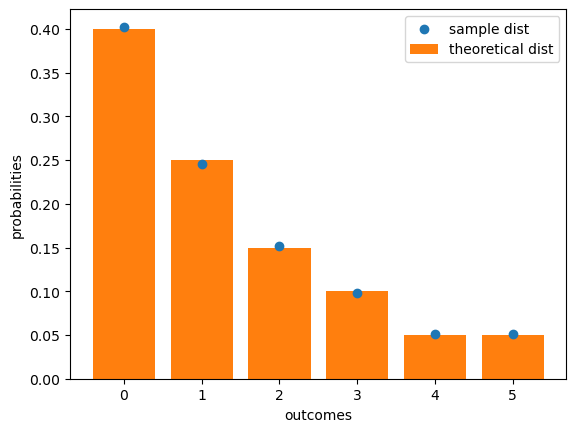

In [20]:
samples=[sampling() for i in range(10000)]
values,counts=np.unique(samples,return_counts=True)
plt.scatter(values,counts/np.sum(counts),zorder=2,label="sample dist")

plt.bar(np.arange(6),PMF_t,label="theoretical dist")
plt.xlabel("outcomes")
plt.ylabel("probabilities")
plt.legend()
plt.show()

## 4. Composition Method and Alias Method